## 39.Zipfの法則

単語の出現頻度順位を横軸、その出現頻度を縦軸として、両対数グラフをプロット

In [3]:
from collections import defaultdict,Counter
import collections
import matplotlib.pyplot as plt
import japanize_matplotlib

In [4]:
with open('./neko.txt.mecab','r') as f:
  text_dict = []
  sentence_dict = []
  # f.read:改行も含めた文字列
  # f.readlines:改行コードを区切って１行ごとに分解されたリスト
  for line in f.readlines():
    if line == '\n':
      continue
    # １文
    elif line != 'EOS\n':
      node = line.split('\t')
      # surfaceが空白の場合除外
      if node[0] == '':
        continue
      # surface 以外はnode[1]
      feature = node[1].split(',')
      word_dict = {
        "surface":node[0],
        "base":feature[6],
        "pos":feature[0],
        "pos1":feature[1]
      }
      sentence_dict.append(word_dict)
    # 追加
    # 追加文が無い場合は除外(elseだと、つまり無い場合も追加したら9210→9964)
    elif len(sentence_dict) != 0:
      text_dict.append(sentence_dict)
      sentence_dict = []

# 35 単語(surface?)とその出現頻度を高い順
import itertools
verb_dict = []
sentence_dict = itertools.chain.from_iterable(text_dict)
# 語彙セット
surface_dict = set()
# 語彙セット(重複あり)
surface = []
# 単語のセット
for sentence in sentence_dict:
  surface_dict.add(sentence['base'])
  surface.append(sentence['base'])

# 語彙数
print(f'語彙数：{len(surface_dict)}')


from collections import defaultdict
word_freq = defaultdict(int)

for word in surface:
  word_freq[word] += 1
# 辞書のvalueを基準に 降順にソート
# keyを基準にする場合、hoge = sorted(hoge.items())
word_freq = sorted(word_freq.items(),key = lambda word:word[1],reverse=True)
print(word_freq[:10])


語彙数：11251
[('の', 9194), ('。', 7486), ('て', 6848), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('だ', 5972), ('と', 5508), ('が', 5337)]


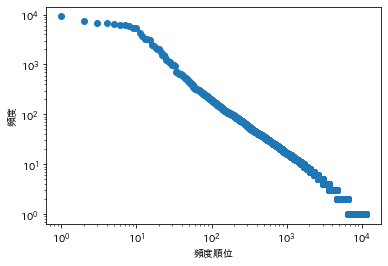

In [7]:
# 39
rank = range(1,len(word_freq)+1)

plt.figure()
plt.scatter(rank,dict(word_freq).values())
# スケールの対数変換
plt.xscale("log")
plt.yscale("log")
plt.xlabel("頻度順位")
plt.ylabel("頻度")
plt.show()

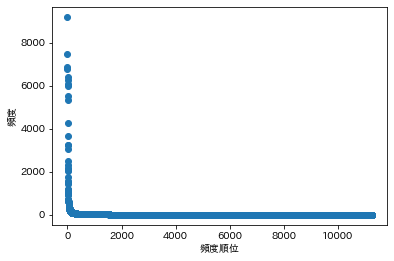

In [8]:
# おまけ：対数変換なし
plt.figure()
plt.scatter(rank,dict(word_freq).values())
plt.xlabel("頻度順位")
plt.ylabel("頻度")
plt.show()